# Modeling and Simulation in Python

Rabbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [27]:
%matplotlib inline

from modsim import *

In [57]:
system = System(t0 = 0, 
                t_end = 26,
                adult_pop0 = 10,
                juvenile_pop0 = 0,
                birth_rate = 0.5,
                death_rate = 0.5,
                mature_rate = 0.33)

system

,value
t0,0.00
t_end,26.00
adult_pop0,10.00
juvenile_pop0,0.00
birth_rate,0.50
death_rate,0.50
mature_rate,0.33


In [66]:
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
    for t in linrange(system.t0, system.t_end):
        if(t < 15):
            system.death_rate = .538
        elif(t < 20):
            system.death_rate = .5
        else:
            system.death_rate = .532
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * adults[t]
        matured = juveniles[t] * (1/3)
        juveniles[t+1] = juveniles[t] + births - matured
        adults[t+1] = adults[t] - deaths + matured 
        
    system.adults = adults
    system.juveniles = juveniles

In [71]:
def run_simulation_ran(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
    count = 0
    for t in linrange(system.t0, system.t_end):
        if(t < 15):
            system.death_rate = .538
        elif(t < 20):
            system.death_rate = .5
        else:
            system.death_rate = .532
            
        
        for i in linrange(adults[t]):
            if flip(system.death_rate):
                count += 1
            
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * adults[t]
        matured = juveniles[t] * (1/3)
        juveniles[t+1] = juveniles[t] + births - matured
        adults[t+1] = adults[t] - deaths + matured 
        count = 0
        
    system.adults = adults
    system.juveniles = juveniles

Test your changes in `run_simulation`:

In [72]:
run_simulation(system)
system.adults

,value
0,10.000000
1,4.620000
2,3.801107
3,3.637222
4,3.567989
5,3.513009
6,3.460740
7,3.409517
8,3.359090
9,3.309415


Next, update `plot_results` to plot both the adult and juvenile `TimeSeries`.

In [73]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot((system.juveniles + system.adults), 'rs', label = 'Owls')
    decorate(xlabel='Years', 
             ylabel='Owl population',
             title=title)
    

And test your updated version of `plot_results`.

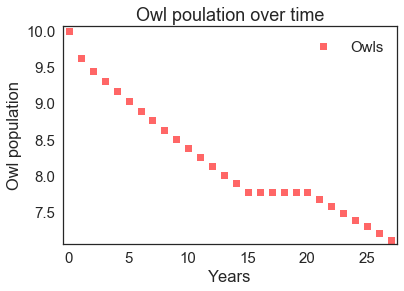

In [74]:
plot_results(system, title='Owl poulation over time')